# Pipeline Orchestration Test
This notebook tests the full orchestration of the sales analytics pipeline to ensure all modules work as intended.

## Notebook for exploration, SQL queries, etc

**Changing to project root directory**

In [1]:
%matplotlib inline
import os
import sys
from pathlib import Path

project_root = Path.cwd().parent
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    
os.chdir(project_root)   
print("Working dir now:", Path.cwd())

Working dir now: c:\Users\KAITO\Desktop\PostgreSql\sales_analytics_pipeline


### 1. Testing db_Hnadler.py

In [ ]:

from src.components.db_handler import PostgresDBHandler

db = PostgresDBHandler(os.getenv('DB_URL'))

df = db.read_query("""SELECT * FROM sales_data
                   WHERE money > 30
                   ORDER BY datetime DESC""")
df.head(5)


[2025-08-02 19:28:15] 17 - src.components.db_handler - INFO - Initializing PostgresDBHandler ....
[2025-08-02 19:28:15] 31 - src.components.db_handler - INFO - Database connection established successfully.
[2025-08-02 19:28:15] 54 - src.components.db_handler - INFO - SQL query executed successfully: SELECT * FROM sales_data
                   WHERE money > 30
                   ORDER BY datetime DESC


,date,datetime,cash_type,card,money,coffee_name
0,2025-03-23,2025-03-23 18:11:38.635,card,ANON-0000-0000-1275,35.76,Latte
1,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa
2,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino
4,2025-03-23,2025-03-23 10:07:11.278,card,ANON-0000-0000-1196,35.76,Latte


### 2. Loadind and Visualizing

[2025-08-02 19:28:53] 18 - src.pipeline.extract - INFO - CSV file loaded successfully from ./data/raw/sales_data.csv.


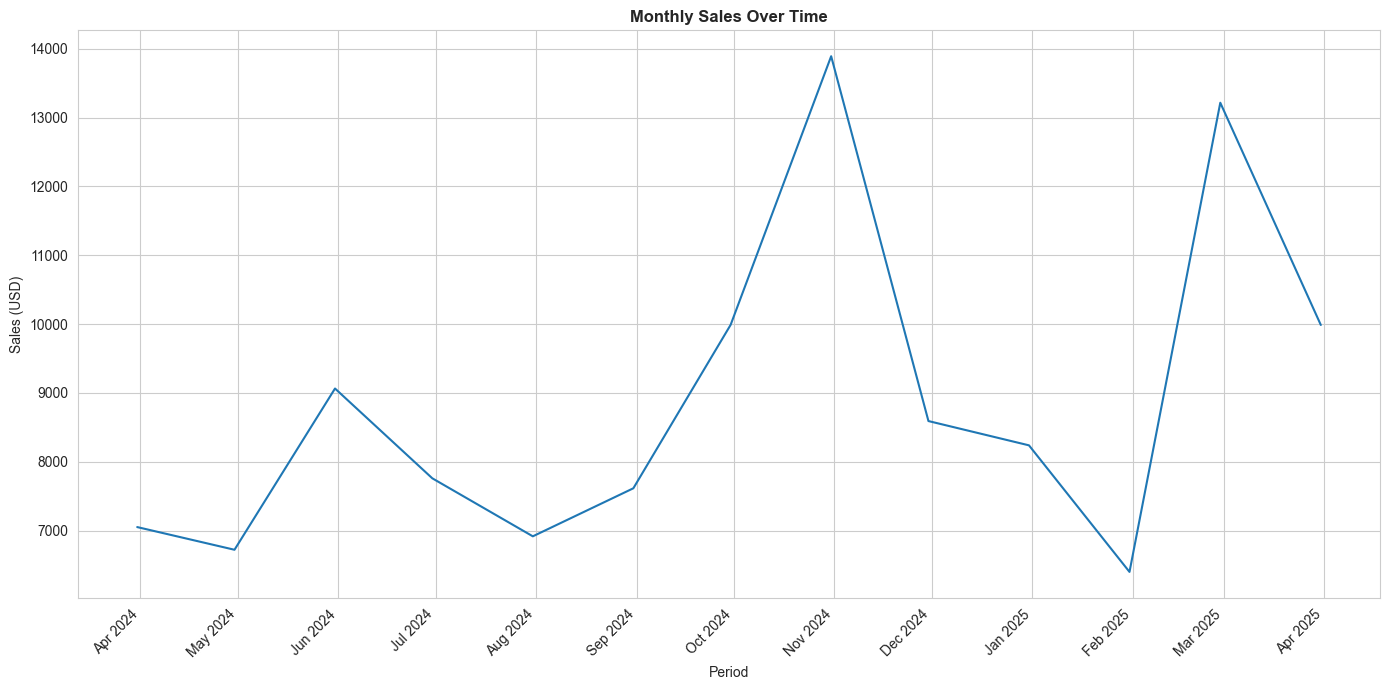

[2025-08-02 19:28:54] 65 - src.components.visualizer - INFO - Plot saved to ./plots\sales_over_time.png


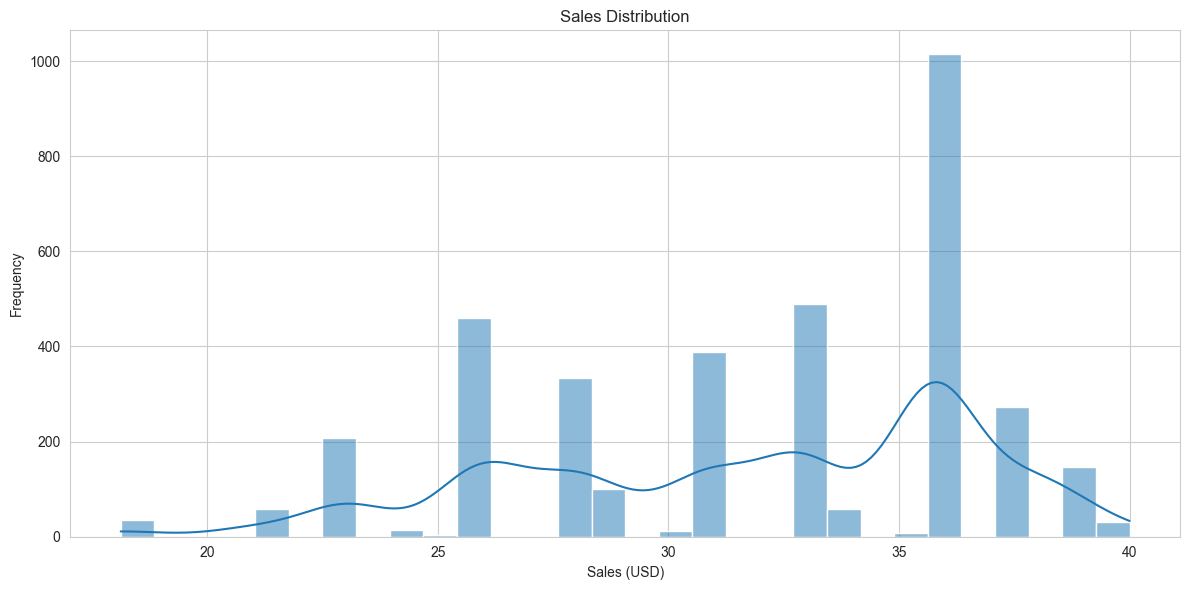

[2025-08-02 19:28:54] 95 - src.components.visualizer - INFO - Plot saved to ./plots\sales_distribution.png


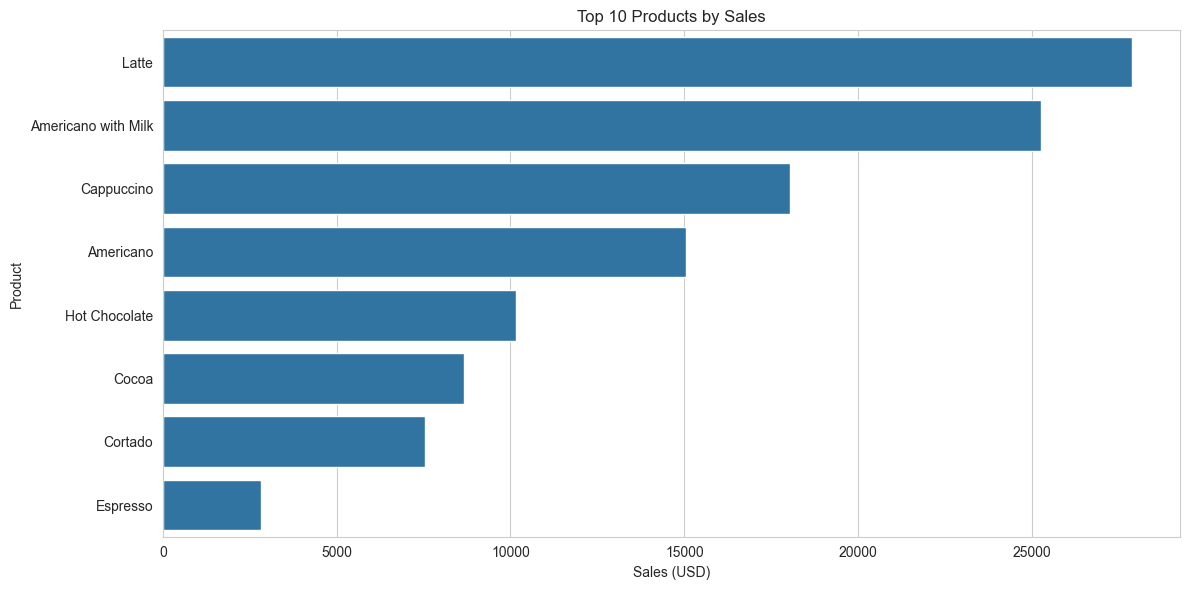

[2025-08-02 19:28:54] 130 - src.components.visualizer - INFO - Plot saved to ./plots\top_products.png


In [6]:
from src.pipeline.extract import load_csv
from src.components.visualizer import SalesVisualizer
from dotenv import load_dotenv

load_dotenv(dotenv_path=project_root / ".env")

df_1 = load_csv(os.getenv('raw_csv_path'))
visualizer = SalesVisualizer()
visualizer.plot_sales_over_time(df_1, date_col='datetime', sales_col='money')
visualizer.plot_sales_distribution(df_1, sales_col='money')
visualizer.plot_top_products(df_1, product_col='coffee_name', sales_col='money', top_n=10)
